> #### **Project Title**
* Car Price Prediction Using Machine Learning

> #### **Objective**
* Accurately predict used car prices based on key features using machine learning models.

> #### **Business Goal**
* Help sellers set fair and competitive prices.
* Make it easier for buyers to spot good deals and build trust.

> #### **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

> #### **2. Load Dataset**

In [348]:
df = pd.read_csv("car_price_prediction.csv")
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


In [349]:
df.shape  

(19237, 18)

### Dataset Description
- **Rows:** 19,237
- **Columns:** 18
- **Target Variable:** `Price`
- **Prediction Task:** Regression (We aim to predict a continuous value — the car's price)


> #### **3. Data Preprocessing**

##### **3.1: Data Cleaning**

In [350]:
df.isnull().sum() # our data have no missing values

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

##### **3.2: Handle Duplicates**

In [351]:
df.shape

(19237, 18)

In [352]:
duplicates = df.duplicated().sum()
duplicates

np.int64(313)

In [353]:
df.drop_duplicates(inplace=True)

In [354]:
df.shape

(18924, 18)

In [355]:
19237 - 18924

313

##### **3.3: Data Inconsistencies and Errors**

In [356]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [357]:
# Check for unique values in each column that helpful for spot inconsistent labels
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique")


Unique Values in Each Column:
ID: 18924 unique
Price: 2315 unique
Levy: 559 unique
Manufacturer: 65 unique
Model: 1590 unique
Prod. year: 54 unique
Category: 11 unique
Leather interior: 2 unique
Fuel type: 7 unique
Engine volume: 107 unique
Mileage: 7687 unique
Cylinders: 13 unique
Gear box type: 4 unique
Drive wheels: 3 unique
Doors: 3 unique
Wheel: 2 unique
Color: 16 unique
Airbags: 17 unique


In [358]:
df.value_counts("Fuel type")  # check for every columns

Fuel type
Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

- `df.unique()` and `df.value_counts()` are extremely useful in Exploratory Data Analysis (EDA), especially when working with categorical or object-type columns. 
- `df.unique()` Helpful for quickly inspect categories, spot typos, or inconsistencies.
- First use `.unique()` to inspect, then `.value_counts()` to measure and fix.

In [359]:
print("\nPotential Inconsistent Categorical Values:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}:", df[col].unique())


Potential Inconsistent Categorical Values:

Levy: ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '87

In [360]:
# we see that column "Levy" have integer values is store as string and something non_numeric. so fix this.
df['Levy'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

In [361]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [362]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
LAMBORGHINI         1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [363]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


- in column "Manufacturer" have 65 unique values. and these unique values create the problem.
- first solution is to drop column but this column directly affect the price. so we see that brands like HYUNDAI and TOYOTA appear thousands of times, while others like LAMBORGHINI, TESLA, or ASTON MARTIN appear only once or twice.
- If a brand appears fewer than 100 times, group it under a new label called 'Other'. and the reason is to avoid overfitting, reduce noise, help encoding, and improve the model. and then perform target encoding.

In [364]:
df.shape

(18924, 18)

In [365]:
df['Manufacturer'] = df['Manufacturer'].str.upper().str.strip()

In [366]:
manufacturer_counts = df['Manufacturer'].value_counts()
common_manufacturers = manufacturer_counts[manufacturer_counts >= 100].index
df['Manufacturer_grouped'] = df['Manufacturer'].apply(lambda x: x if x in common_manufacturers else 'Other')

In [367]:
df.drop(columns="Manufacturer", inplace=True)

In [368]:
df['Manufacturer_grouped'].nunique() 

19

In [369]:
df.shape

(18924, 18)

In [370]:
df['Model'].nunique()
 # in this feature have high-cardinality categorical, and it can cause serious problems in ml model if we used directly.

1590

In [371]:
df['Model'].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], shape=(1590,), dtype=object)

In [372]:
df['Model'].value_counts()

Model
Prius               1069
Sonata              1067
Camry                929
Elantra              910
E 350                534
                    ... 
Vito Exstralong        1
Versa SE               1
Fusion HYBRID SE       1
C30                    1
Optima k5              1
Name: count, Length: 1590, dtype: int64

- feature `Model` have 1590 unique values and values like 'RX 450', 'Equinox', 'FIT','E 230 124', 'RX 450 F SPORT'.
so we decide to drop this column because this feature need many things like feature extraction, keep only the base parts, 
perform target encoding and then all this have lots of unique values.

In [373]:
df.drop(columns="Model", inplace=True)

- "ID" feature have high cardinality, no predictive power, can cause overfitting, add noice for training. so drop these type of features.

In [374]:
df.drop(columns=['ID'], inplace=True)

In [375]:
df['Category'].nunique()

11

In [376]:
# in this feature apply the target encoding is best. label encoding if we use the tree base model.
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [377]:
df['Category'].value_counts()

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

In [378]:
df.dtypes

Price                     int64
Levy                      int64
Prod. year                int64
Category                 object
Leather interior         object
Fuel type                object
Engine volume            object
Mileage                  object
Cylinders               float64
Gear box type            object
Drive wheels             object
Doors                    object
Wheel                    object
Color                    object
Airbags                   int64
Manufacturer_grouped     object
dtype: object

In [379]:
df['Leather interior'].unique()

array(['Yes', 'No'], dtype=object)

In [380]:
df['Leather interior'].value_counts()

Leather interior
Yes    13731
No      5193
Name: count, dtype: int64

In [381]:
df['Fuel type'].nunique()

7

In [382]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [383]:
df['Engine volume'].nunique()

107

In [384]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [385]:
df['Engine volume'].value_counts()

Engine volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
5.4 Turbo       1
0.3 Turbo       1
5.2             1
5.8             1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

- mixes engine size with engine type: Mixed formats	'2.0' vs '2.0 Turbo'
- we need to Extract like "engine_volume" (numeric part).
- also we create is_turbo feature like binary 


In [386]:
df['engine_volume_num'] = df['Engine volume'].str.extract(r'([0-9.]+)').astype(float)

In [387]:
df['is_turbo'] = df['Engine volume'].str.contains('Turbo', case=False).astype(int)

In [388]:
df.drop(columns= "Engine volume", inplace=True)

In [389]:
df['is_turbo'].unique()

array([0, 1])

In [390]:
df['engine_volume_num'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [391]:
df.shape

(18924, 17)

In [392]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], shape=(7687,), dtype=object)

In [393]:
df['Mileage'].nunique()

7687

In [394]:
# Remove ' km' and commas if available
df['Mileage_clean'] = df['Mileage'].str.replace(' km', '', regex=False).str.replace(',', '')
df['Mileage_clean'] = pd.to_numeric(df['Mileage_clean'], errors='coerce')  # convert to numeric


In [395]:
df['Mileage_clean'].value_counts() # in this 0 Mileage is consider as new car.

Mileage_clean
0         714
200000    181
150000    159
160000    120
180000    117
         ... 
23430       1
132700      1
140607      1
307325      1
152582      1
Name: count, Length: 7687, dtype: int64

In [396]:
high_mileage_count = df[df['Mileage_clean'] > 500000].shape[0]
zero_mileage_count = df[df['Mileage_clean'] == 0].shape[0]
print(f"Entries with Mileage > 500,000: {high_mileage_count}")
print(f"Entries with Mileage == 0: {zero_mileage_count}")

Entries with Mileage > 500,000: 254
Entries with Mileage == 0: 714


In [397]:
# Calculate valid median
valid_mileage_median = df[(df['Mileage_clean'] > 0) & (df['Mileage_clean'] <= 500000)]['Mileage_clean'].median()
print(f"Median Mileage used for replacement: {valid_mileage_median}")

Median Mileage used for replacement: 129000.0


In [398]:
# Replace both high and zero mileage values with median
df.loc[(df['Mileage_clean'] > 500000) | (df['Mileage_clean'] == 0), 'Mileage_clean'] = valid_mileage_median

In [399]:
df['Mileage_clean'].value_counts()

Mileage_clean
129000    988
200000    181
150000    159
160000    120
180000    117
         ... 
68286       1
59158       1
168341      1
75988       1
74146       1
Name: count, Length: 7505, dtype: int64

In [400]:
df.shape

(18924, 18)

In [401]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [402]:
df['Gear box type'].value_counts()

Gear box type
Automatic    13282
Tiptronic     3065
Manual        1844
Variator       733
Name: count, dtype: int64

In [403]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [404]:
df.dtypes

Price                     int64
Levy                      int64
Prod. year                int64
Category                 object
Leather interior         object
Fuel type                object
Mileage                  object
Cylinders               float64
Gear box type            object
Drive wheels             object
Doors                    object
Wheel                    object
Color                    object
Airbags                   int64
Manufacturer_grouped     object
engine_volume_num       float64
is_turbo                  int64
Mileage_clean             int64
dtype: object

In [405]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [406]:
df['Doors'].value_counts()

Doors
04-May    18032
02-Mar      768
>5          124
Name: count, dtype: int64

In [407]:
df['Wheel'].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [408]:
df['Wheel'].value_counts()

Wheel
Left wheel          17471
Right-hand drive     1453
Name: count, dtype: int64

In [409]:
df['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Green', 'Red',
       'Sky blue', 'Orange', 'Yellow', 'Brown', 'Golden', 'Beige',
       'Carnelian red', 'Purple', 'Pink'], dtype=object)

In [410]:
# One-hot encode for color feature as temporarily
df_encoded = pd.get_dummies(df[['Color', 'Price']], drop_first=True)

# perform Correlation
correlations = df_encoded.corr()['Price'].sort_values(ascending=False)
print(correlations) # we see that all color columns show near-zero correlation, so drop it.


Price                  1.000000
Color_Blue             0.022508
Color_Grey             0.001282
Color_Black            0.001014
Color_Yellow           0.000827
Color_Brown            0.000665
Color_White           -0.001277
Color_Carnelian red   -0.001355
Color_Pink            -0.001512
Color_Golden          -0.001843
Color_Sky blue        -0.001890
Color_Purple          -0.002306
Color_Orange          -0.003362
Color_Red             -0.004742
Color_Green           -0.006228
Color_Silver          -0.008935
Name: Price, dtype: float64


In [411]:
df.drop(columns=['Doors', 'Color'], inplace=True)

In [412]:
df.shape

(18924, 16)

##### **3.4: ENCODING**

In [413]:
df.drop(columns='Mileage', inplace=True)

In [414]:
df.dtypes

Price                     int64
Levy                      int64
Prod. year                int64
Category                 object
Leather interior         object
Fuel type                object
Cylinders               float64
Gear box type            object
Drive wheels             object
Wheel                    object
Airbags                   int64
Manufacturer_grouped     object
engine_volume_num       float64
is_turbo                  int64
Mileage_clean             int64
dtype: object

- Features like `Leather interior`, `Drive wheels`, `Wheel` apply label encoding.

In [415]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Leather interior'] = le.fit_transform(df['Leather interior'])
df['Drive wheels'] = le.fit_transform(df['Drive wheels'])
df['Wheel'] = le.fit_transform(df['Wheel'])


In [416]:
manufacturer_price_map = df.groupby('Manufacturer_grouped')['Price'].mean().to_dict()
df['Manufacturer_grouped'] = df['Manufacturer_grouped'].map(manufacturer_price_map)


- feature `Category` have low-cardinality (≤15 categories), so ideal for One-Hot Encoding
- apply OHE  on features like `Category`, `Fuel type`, `Gear box type`.

In [417]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Category', 'Fuel type', 'Gear box type']
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Select remaining numerical features (drop target + encoded features)
numerical_cols = [
    'Levy', 'Prod. year', 'Leather interior', 'Cylinders', 'Drive wheels',
    'Wheel', 'Airbags', 'Manufacturer_grouped', 'engine_volume_num',
    'is_turbo', 'Mileage_clean'
]
X_final = pd.concat([X_encoded_df.reset_index(drop=True), df[numerical_cols].reset_index(drop=True)], axis=1)
y = df['Price']


In [418]:
X_final.shape

(18924, 30)

In [419]:
X_encoded_df.shape

(18924, 19)

In [420]:
X_final.head(2)

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,...,Prod. year,Leather interior,Cylinders,Drive wheels,Wheel,Airbags,Manufacturer_grouped,engine_volume_num,is_turbo,Mileage_clean
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2010,1,6.0,0,0,12,20052.594391,3.5,0,186005
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2011,0,6.0,0,0,8,14894.873926,3.0,0,192000


##### **3.5: Handling Outliers**

In [421]:
# Calculate outlier percentage for all features in the dataset using IQR method
def calculate_outlier_percentages(X_final):
    outlier_percentages = {}
    for col in X_final.columns:
        Q1 = X_final[col].quantile(0.25)
        Q3 = X_final[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = X_final[(X_final[col] < lower_bound) | (X_final[col] > upper_bound)][col]
        outlier_percentages[col] = len(outliers) / len(X_final) * 100  # Percentage of outliers
    return outlier_percentages

outlier_percentages_all = calculate_outlier_percentages(X_final)
outlier_percentages_all

{'Category_Coupe': 2.7901077996195305,
 'Category_Goods wagon': 1.2101035721834708,
 'Category_Hatchback': 14.790741915028535,
 'Category_Jeep': 0.0,
 'Category_Limousine': 0.05812724582540689,
 'Category_Microbus': 1.58000422743606,
 'Category_Minivan': 3.3449587824984146,
 'Category_Pickup': 0.2694990488268865,
 'Category_Sedan': 0.0,
 'Category_Universal': 1.9076305220883536,
 'Fuel type_Diesel': 21.142464595222997,
 'Fuel type_Hybrid': 18.701120270555908,
 'Fuel type_Hydrogen': 0.00528429507503699,
 'Fuel type_LPG': 4.676601141407736,
 'Fuel type_Petrol': 0.0,
 'Fuel type_Plug-in Hybrid': 0.44916508137814415,
 'Gear box type_Manual': 9.744240118368209,
 'Gear box type_Tiptronic': 16.196364404988376,
 'Gear box type_Variator': 3.8733882900021137,
 'Levy': 5.574931304164025,
 'Prod. year': 5.083491862185585,
 'Leather interior': 0.0,
 'Cylinders': 25.179666032551257,
 'Drive wheels': 32.91587402240541,
 'Wheel': 7.678080744028747,
 'Airbags': 0.0,
 'Manufacturer_grouped': 4.412386387

- outliers to handle that above 10%.
- Features `Fuel type_Diesel	21.14%`, `Fuel type_Hybrid	18.70%`, `Gear box type_Tiptronic	16.19%`, `Category_Hatchback	14.79%`, `Cylinders	25.17%`, `Drive wheels 32.91%`

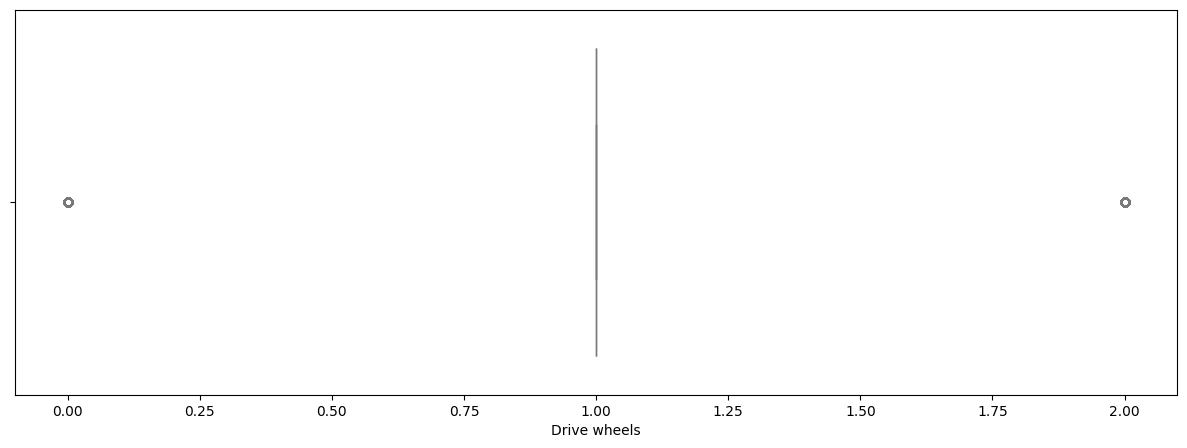

In [422]:
# one by one apply on all 6 features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.boxplot(x= "Drive wheels",data= X_final, color='lightblue')
plt.show()

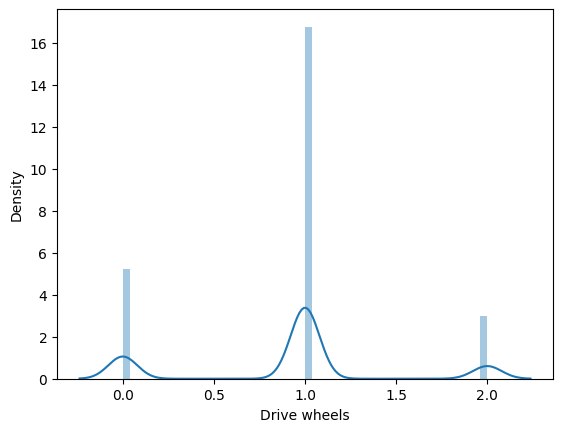

In [423]:
sns.distplot(X_final["Drive wheels"])
plt.show()

In [424]:
# create the function
def iqr_outlier_range(X_final):
    Q1 = np.percentile(X_final, 25)  # First quartile (25th percentile)
    Q3 = np.percentile(X_final, 75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    # Define outlier boundaries
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR

    print(f"Minimum Outlier Range: {min_range}")
    print(f"Maximum Outlier Range: {max_range}")
    return min_range, max_range

In [425]:
# Apply the function to the "Flight_miles_12mo" column
min_range, max_range = iqr_outlier_range(X_final['Drive wheels'])

Minimum Outlier Range: 1.0
Maximum Outlier Range: 1.0


In [426]:
X_final = X_final[(X_final['Drive wheels'] >= min_range) & (X_final['Drive wheels'] <= max_range)]

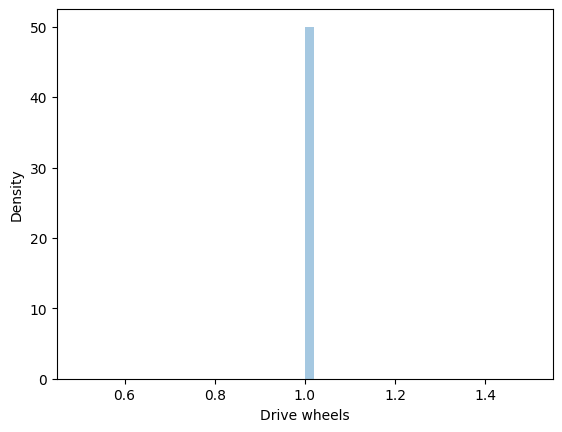

In [427]:
sns.distplot(X_final["Drive wheels"])
plt.show()

In [429]:
X_final.shape

(12695, 30)

In [430]:
X_final['Price']= y

In [431]:
X_final.shape

(12695, 31)

In [432]:
X_final.head(2)

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,...,Leather interior,Cylinders,Drive wheels,Wheel,Airbags,Manufacturer_grouped,engine_volume_num,is_turbo,Mileage_clean,Price
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4.0,1,1,2,14162.073958,1.3,0,200000,8467.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,1,0,4,14162.073958,1.3,0,91901,11726.0


In [2]:
# Save X_final to a CSV file
X_final.to_csv('cleaned_car_price_prediction.csv', index=False)

NameError: name 'X_final' is not defined

In [434]:
import os
print(os.getcwd())


g:\data\!!!  DATA SCIENCE  !!!\Machine Projects


##### **3.6: EDA Visualization**

In [32]:
data = pd.read_csv("cleaned_car_price_prediction.csv")
data.head(2)

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,...,Leather interior,Cylinders,Drive wheels,Wheel,Airbags,Manufacturer_grouped,engine_volume_num,is_turbo,Mileage_clean,Price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4.0,1,1,2,14162.073958,1.3,0,200000,8467.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.0,1,0,4,14162.073958,1.3,0,91901,11726.0


In [33]:
data.isnull().sum()

Category_Coupe                0
Category_Goods wagon          0
Category_Hatchback            0
Category_Jeep                 0
Category_Limousine            0
Category_Microbus             0
Category_Minivan              0
Category_Pickup               0
Category_Sedan                0
Category_Universal            0
Fuel type_Diesel              0
Fuel type_Hybrid              0
Fuel type_Hydrogen            0
Fuel type_LPG                 0
Fuel type_Petrol              0
Fuel type_Plug-in Hybrid      0
Gear box type_Manual          0
Gear box type_Tiptronic       0
Gear box type_Variator        0
Levy                          0
Prod. year                    0
Leather interior              0
Cylinders                     0
Drive wheels                  0
Wheel                         0
Airbags                       0
Manufacturer_grouped          0
engine_volume_num             0
is_turbo                      0
Mileage_clean                 0
Price                       214
dtype: i

In [34]:
data['Price'].fillna(data['Price'].mean(), inplace=True)

In [35]:
print(data['Price'].isna().sum())


0


                          Category_Coupe  Category_Goods wagon  \
Category_Coupe                  1.000000             -0.016207   
Category_Goods wagon           -0.016207              1.000000   
Category_Hatchback             -0.071757             -0.060096   
Category_Jeep                  -0.067528             -0.056554   
Category_Limousine             -0.001235             -0.001034   
Category_Microbus              -0.009902             -0.008293   
Category_Minivan               -0.028197             -0.023615   
Category_Pickup                -0.003493             -0.002926   
Category_Sedan                 -0.138595             -0.116072   
Category_Universal             -0.021157             -0.017718   
Fuel type_Diesel               -0.060325              0.141853   
Fuel type_Hybrid               -0.064808             -0.065585   
Fuel type_Hydrogen             -0.001235             -0.001034   
Fuel type_LPG                  -0.034659             -0.023184   
Fuel type_

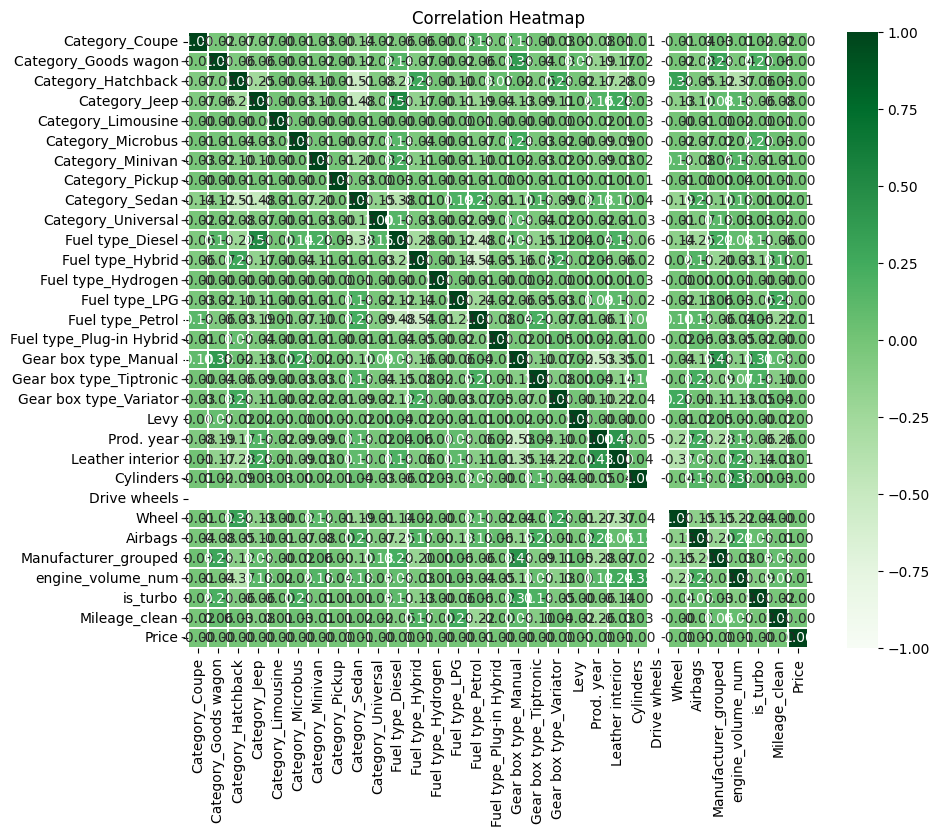

In [36]:
# Correlation matrix
corr = data.corr()
print(corr)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens', linewidths=0.3, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap")
plt.show()


* in this we only print features that have low correlation and after that dropped these columns manually.
- Rule of Thumb (General Rule)

| Correlation Coefficient | Meaning                        |
| ----------------------- | ------------------------------ |
| **0.7 to 1.0**          | Strong positive relationship   |
| **0.3 to 0.7**          | Moderate positive relationship |
| **0.0 to 0.3**          | Weak or no relationship        |
| **-0.3 to -0.7**        | Moderate negative relationship |
| **-0.7 to -1.0**        | Strong negative relationship   |


In [37]:
# Check features weakly correlated with Target (< 0.3 and > -0.3)
target_corr = corr['Price'].drop('Price')  # exclude self-correlation
weak_corr = target_corr[(target_corr > -0.3) & (target_corr < 0.3)]

print("❌ Features weakly correlated with Target (below ±0.3):")
print(weak_corr)

❌ Features weakly correlated with Target (below ±0.3):
Category_Coupe             -0.002242
Category_Goods wagon       -0.000330
Category_Hatchback         -0.004780
Category_Jeep              -0.002995
Category_Limousine         -0.000392
Category_Microbus          -0.000753
Category_Minivan           -0.002049
Category_Pickup            -0.000020
Category_Sedan              0.008247
Category_Universal         -0.001106
Fuel type_Diesel           -0.003200
Fuel type_Hybrid            0.014520
Fuel type_Hydrogen         -0.000012
Fuel type_LPG              -0.002730
Fuel type_Petrol           -0.007994
Fuel type_Plug-in Hybrid   -0.001616
Gear box type_Manual       -0.002869
Gear box type_Tiptronic    -0.002738
Gear box type_Variator     -0.002558
Levy                        0.000047
Prod. year                 -0.003005
Leather interior            0.005836
Cylinders                  -0.000686
Wheel                      -0.002108
Airbags                     0.003130
Manufacturer_grouped

- But the question arise is that Correlation (corr()) measures only linear relationships. but Some features might help non-linear models like: Tree-based models (Random Forest, XGBoost, LightGBM), Neural networks.
- So the recommented steps is:
1. Test feature importance using a quick baseline model (e.g. RandomForest or XGBoost).
→ See which features the model actually uses.
2. Drop only after feature importance is also very low across multiple models and have low corr, both is consider.
3. Check multicollinearity to remove redundant features — that’s often more impactful than dropping low-correlation features.

In [38]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop('Price', axis=1)
y = data['Price']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))

Mileage_clean              0.584476
Levy                       0.214012
Prod. year                 0.037174
Gear box type_Variator     0.027288
engine_volume_num          0.023037
Airbags                    0.022974
Manufacturer_grouped       0.020779
Fuel type_Hybrid           0.016491
Category_Sedan             0.007338
Fuel type_Petrol           0.005530
Leather interior           0.005265
Category_Hatchback         0.004504
Cylinders                  0.004501
Category_Jeep              0.004165
Gear box type_Tiptronic    0.004055
Wheel                      0.003723
is_turbo                   0.002586
Fuel type_Diesel           0.002564
Gear box type_Manual       0.001956
Fuel type_LPG              0.001891
dtype: float64


In [13]:
# Drop features with very low importance
threshold = 0.001  # keep features with importance 
important_features = importances[importances < threshold].index
X_reduced = X[important_features]

print(f"Features kept: {important_features}")


Features kept: Index(['Category_Goods wagon', 'Category_Microbus', 'Fuel type_Plug-in Hybrid',
       'Category_Pickup', 'Fuel type_Hydrogen', 'Category_Limousine',
       'Drive wheels'],
      dtype='object')


- But again the question arise the tree models can use weak features collectively, even small individual contributions can add up.
- Some one-hot encoded categories look small because they’re binary and sparse.
- Sometimes removing features can reduce accuracy even if their individual importances look small.

- **Best Approach**
1. Train your model with all features and record RMSE/R².
2. and after that Drop the very weakest features (e.g. importance < 0.002).
3. Re-train and check RMSE/R² again.
4. If performance stays the same then it’s safe to drop them.
5. If performance drops then put them back.

##### **Visualizations to Collect Insights**
##### * Univariate Analysis

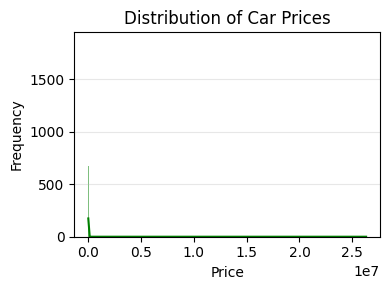

count    1.269500e+04
mean     1.912272e+04
std      2.340701e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.332800e+04
75%      2.194500e+04
max      2.630750e+07
Name: Price, dtype: float64


In [ ]:
# `Price` Target VAriable
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Price
plt.figure(figsize=(4, 3))
sns.histplot(data['Price'], kde=True, color='green')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display basic statistics
print(data['Price'].describe())


- `Distribution Shape:` Most car prices are clustered at the lower end, creating a right-skewed (long-tail) distribution.
- `Range & Extremes:` We can see the minimum and maximum prices, as well as the mean and median, allowing us to spot any extreme outliers.
- `Central Tendency:` The average price is around mean = … and the 50% percentile = …, which tells us what most people pay.
- `Business Impact:` This insight is important for understanding the market positioning of the dataset (mostly affordable cars vs. luxury cars). It also hints that we might need a log-transformation before training some models to reduce skewness.

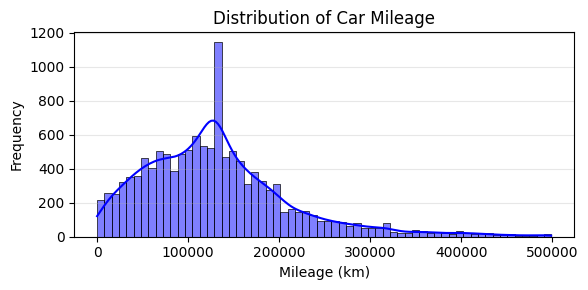

count     12695.000000
mean     131113.326506
std       82101.491217
min          13.000000
25%       73681.000000
50%      124226.000000
75%      168810.500000
max      498815.000000
Name: Mileage_clean, dtype: float64


In [ ]:
# Analyse `Mileage_clean`
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Mileage
plt.figure(figsize=(6, 3))
sns.histplot(data['Mileage_clean'], kde=True, color='blue')
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display basic statistics
print(data['Mileage_clean'].describe())


- `Distribution Shape:`Most cars have mileage concentrated in a lower range (e.g. below 200,000 km), with a long tail reaching into higher mileages.
- `Range & Extremes:`
- `Mean vs Median:` The mean mileage is typically higher than the median, showing some high-mileage outliers.
- `Min & Max Values:` Gives you an idea of the most used vs least used cars — helpful for detecting suspicious entries or cleaning further.
- `Business Impact:`Knowing the mileage distribution can help us understand wear and tear trends, identify typical usage, and make decisions about pricing strategies.For the model, this may also indicate we might want to apply log-transformation or bin mileage into categories if needed.



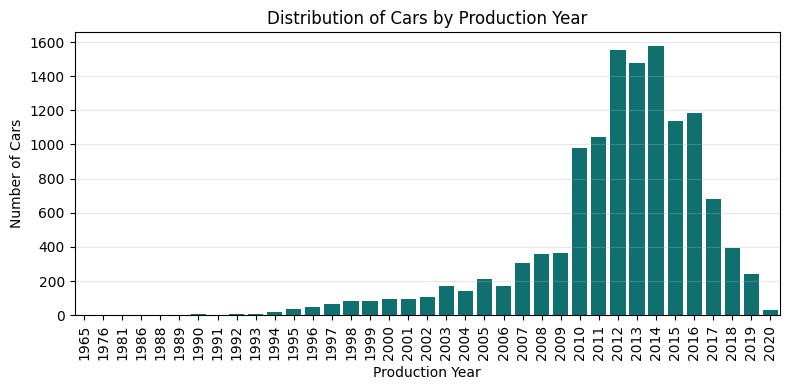

count    12695.000000
mean      2011.928948
std          4.644269
min       1965.000000
25%       2010.000000
50%       2013.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64

Unique years:
 [2006 2014 2016 2010 2013 1997 2018 2012 2017 2001 1995 2008 2011 2019
 2007 2004 2015 2009 2003 1996 1998 2002 2000 1992 1994 1999 2005 2020
 1986 1991 1993 1989 1965 1990 1976 1988 1981]


In [28]:
# Analyze `Prod. year`
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of cars per production year
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Prod. year', color='teal')
plt.title('Distribution of Cars by Production Year')
plt.xlabel('Production Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)  # Rotate x labels if there are many years
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display basic statistics
print(data['Prod. year'].describe())
print("\nUnique years:\n", data['Prod. year'].unique())


- `Distribution Shape:`The countplot reveals which production years have the most cars listed — you’ll typically see a peak around newer models and fewer very old cars.
- `Business Impact:` Knowing the production-year distribution:
- Gives a sense of the age profile of cars for sale.
- Shows whether the dataset is mostly new, mid-age, or old cars, which directly influences price modeling.
- `Useful Observations:`If most cars come from a few specific years, we can:
- Check for potential class imbalance.
- Consider creating age-based features (current_year - Prod. year) for better model performance.



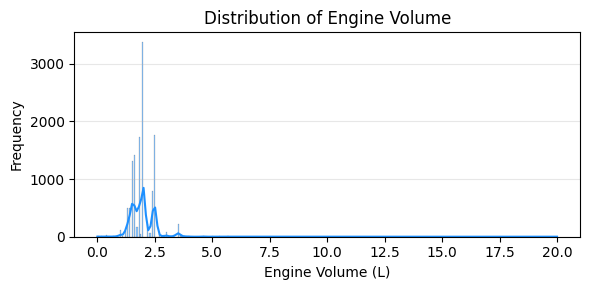

count    12695.000000
mean         1.959653
std          0.555667
min          0.000000
25%          1.600000
50%          2.000000
75%          2.200000
max         20.000000
Name: engine_volume_num, dtype: float64


In [ ]:
# engine_volume_num
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of engine volume
plt.figure(figsize=(6, 3))
sns.histplot(data['engine_volume_num'], kde=True, color='dodgerblue')
plt.title('Distribution of Engine Volume')
plt.xlabel('Engine Volume (L)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display summary statistics
print(data['engine_volume_num'].describe())



- `Distribution Shape:` This histogram reveals the typical engine sizes in the dataset. You’ll likely see most engines clustered around 1.2L to 3.0L, with a small number of larger engines (e.g. 4.0L+).
- `Range & Extremes:` The describe() output will give you the min, max, and quartiles — perfect for spotting any extreme engine sizes or potential errors.
- `Business Impact:` Engine size often reflects the performance class of a car.
- maller engines → economy, fuel efficiency.
- Larger engines → premium or sports cars with higher prices.

##### * BIVARIATE ANALYSIS

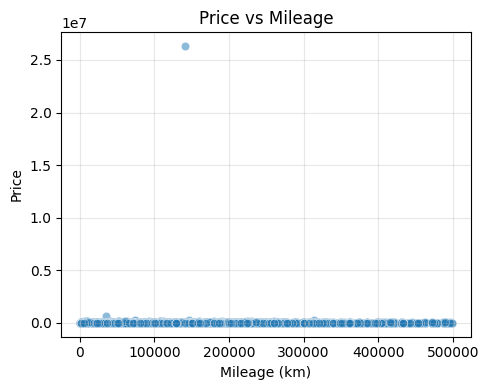

In [38]:
# Mileage_clean vs Price
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.scatterplot(data=data, x='Mileage_clean', y='Price', alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Trend: Cars with higher mileage tend to have lower prices.
- Outliers: Spot extremely low-mileage or very-high-mileage cars with unusual prices.

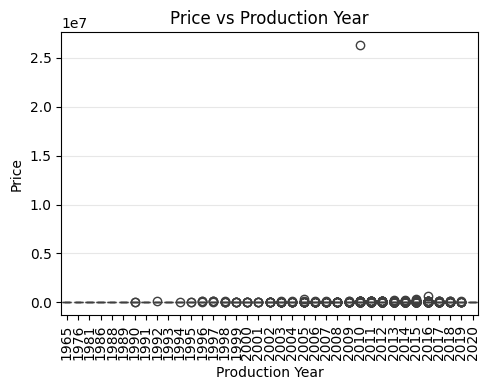

In [ ]:
# Prod. year vs Price
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, x='Prod. year', y='Price')
plt.title('Price vs Production Year')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


- Trend: Newer cars sell for more — the boxplots will show a price increase in newer years.
- Price variability: Older years often have wider price variation.

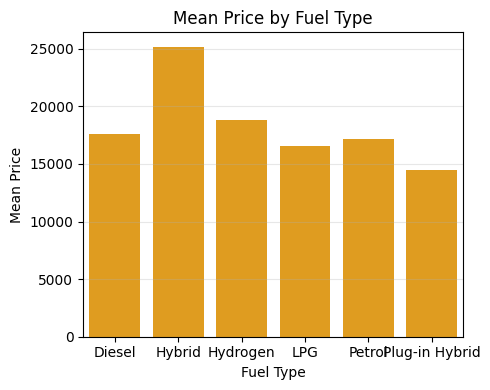

In [ ]:
# Fuel types vs Price
fuel_cols = [col for col in data.columns if col.startswith('Fuel type_')]

# Compute mean price per fuel type column
mean_prices = {}
for col in fuel_cols:
    mean_prices[col.replace('Fuel type_', '')] = data.loc[data[col] == 1, 'Price'].mean()

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x=list(mean_prices.keys()), y=list(mean_prices.values()), color='orange')
plt.title('Mean Price by Fuel Type')
plt.ylabel('Mean Price')
plt.xlabel('Fuel Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



- Premium Fuel Types (e.g. Hybrid, Hydrogen) show higher mean prices:  this matches the trend that eco-friendly and modern engine technologies usually come in newer, higher-end models.
- Diesel and Petrol cars typically have a lower average price — they tend to be more common, mass-market options with a broad range of prices.
- CNG and plug-in Hybrid cars usually lie on the budget-friendly end, reflecting their niche usage and affordability.
- This analysis indicates that fuel technology plays a big role in the vehicle’s value — more advanced fuel types often signal newer, costlier cars

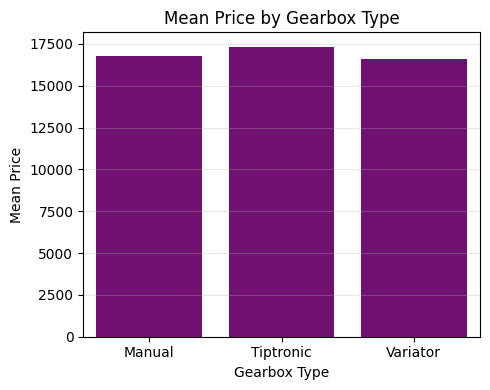

In [ ]:
# Gear box type vs Price
# Extract gearbox columns
gearbox_cols = [col for col in data.columns if col.startswith('Gear box type_')]

# Compute mean price per gearbox type
mean_price_gearbox = {}
for col in gearbox_cols:
    mean_price_gearbox[col.replace('Gear box type_', '')] = data.loc[data[col] == 1, 'Price'].mean()

# Plot mean price per gearbox type
plt.figure(figsize=(5,4))
sns.barplot(x=list(mean_price_gearbox.keys()), y=list(mean_price_gearbox.values()), color='purple')
plt.title('Mean Price by Gearbox Type')
plt.ylabel('Mean Price')
plt.xlabel('Gearbox Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


- Automatic-style gearboxes (Tiptronic) typically have a higher average price compared to standard Manual — suggesting buyers pay more for advanced or convenient transmission systems.
- Manual gearboxes tend to be associated with lower-priced cars, making them more common in economy or basic vehicle segments.
- Business Impact:
Dealerships and car makers can leverage this insight — offering more automatic or tiptronic models could help drive up average transaction prices.
For customers, these differences highlight the premium they pay for convenience and driving comfort.

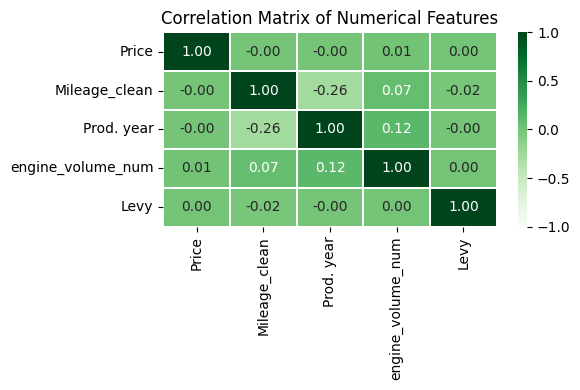

In [50]:
#  Correlation Heatmap (Numerical Features)
numerical_cols = ['Price', 'Mileage_clean', 'Prod. year', 'engine_volume_num', 'Levy']
corr = data[numerical_cols].corr()

plt.figure(figsize=(6, 4))
# sns.heatmap(corr, annot=True, cmap='Greens', vmin=-1, vmax=1)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens', linewidths=0.3, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


* **Multivariate Analysis**
- Scatter Plot with Hue = Fuel Type

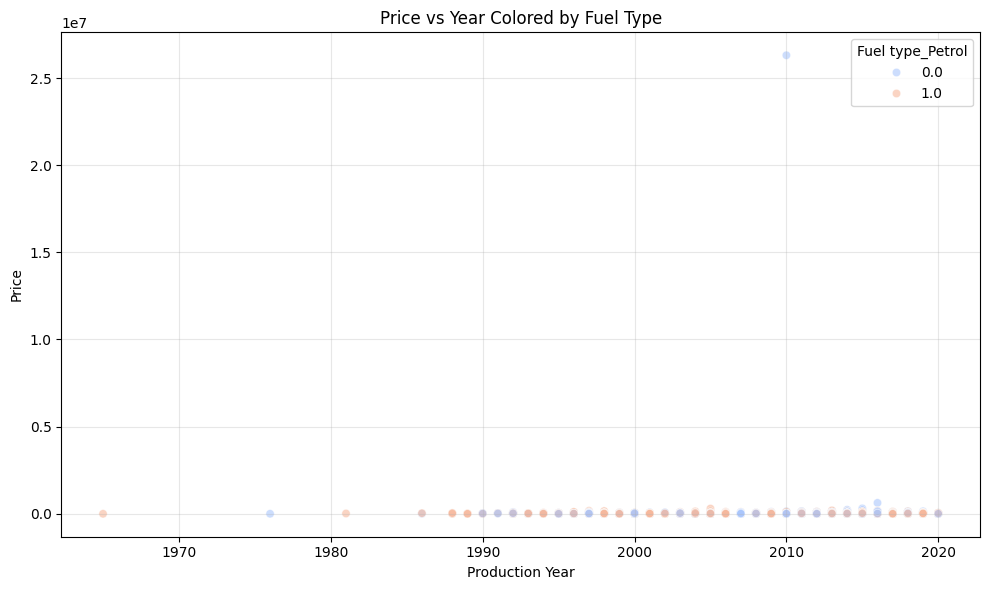

In [ ]:
# See how Mileage_clean and Prod. year jointly affect Price, colored by fuel type.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Prod. year',
    y='Price',
    hue='Fuel type_Petrol',  # if encoded as dummy
    palette='coolwarm',
    alpha=0.6
)
plt.title('Price vs Year Colored by Fuel Type')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Pairplot of Numerical Features

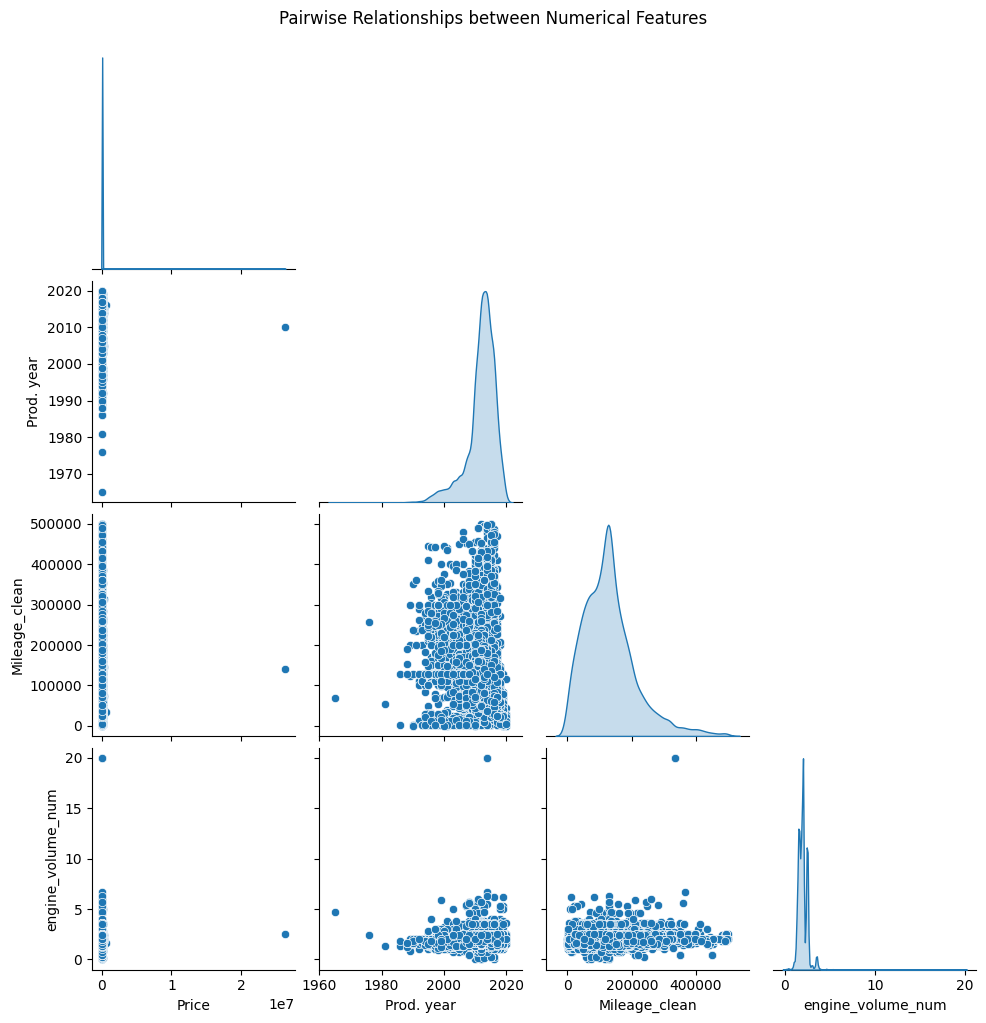

In [53]:
# See pairwise scatter plots across multiple numeric variables.
sns.pairplot(
    data[['Price', 'Prod. year', 'Mileage_clean', 'engine_volume_num']],
    corner=True,
    diag_kind='kde'
)
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()


- Gives a quick overview of relationships — price vs mileage, price vs engine volume, etc.
- Identifies potential non-linear patterns or clusters.

- Boxplot for Category vs Price, Split by Gearbox Type

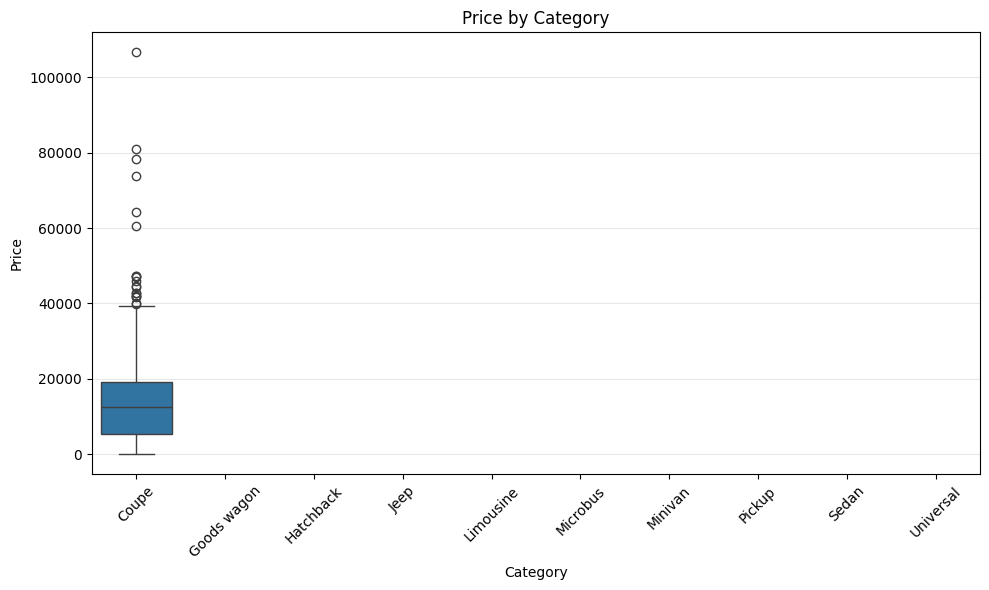

In [56]:
# See how price varies by car category and gearbox together.
# Get all Category dummy columns
category_cols = [col for col in data.columns if col.startswith('Category_')]

# Create melted DataFrame with Category names
category_df = data[category_cols].copy()
category_df = category_df.melt(var_name='Category', value_name='Value')
category_df = category_df[category_df['Value']==1]

# Merge Category with the original DataFrame's Price
category_df = category_df.join(data[['Price']], how='left')
category_df['Category'] = category_df['Category'].str.replace('Category_', '')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=category_df, x='Category', y='Price')
plt.title('Price by Category')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



- Mean Price by Fuel and Gearbox Type (Pivot Table)

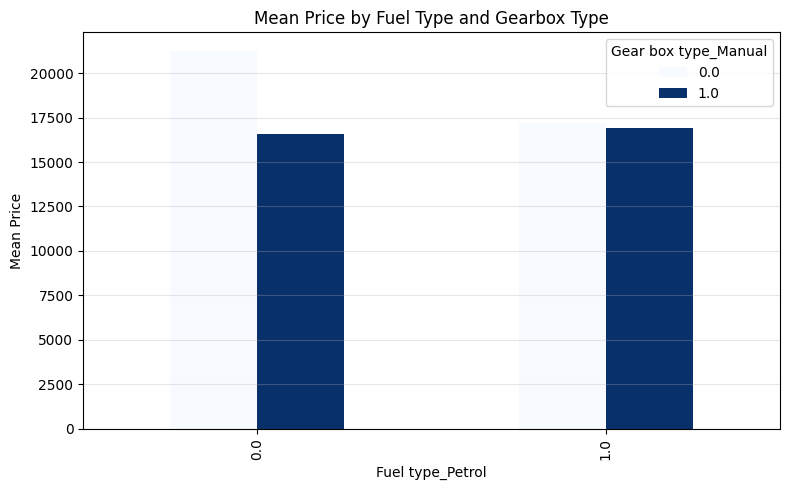

Gear box type_Manual           0.0           1.0
Fuel type_Petrol                                
0.0                   21238.783454  16600.209915
1.0                   17212.274745  16935.221713


In [ ]:
# Combine multiple categorical features and look at their effect on Price.
pivot = data.groupby(
    ['Fuel type_Petrol', 'Gear box type_Manual']
)['Price'].mean().unstack()

pivot.plot(kind='bar', figsize=(8, 5), cmap='Blues')
plt.title('Mean Price by Fuel Type and Gearbox Type')
plt.ylabel('Mean Price')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(pivot)


-  Cross-tabulation reveals interactions between fuel and gearbox choices — e.g. Petrol-Manual cars may average less than Petrol-Automatic, suggesting what buyers pay for these combinations.

> #### **4. SCALING**

In [39]:
X.shape

(12695, 30)

In [40]:
y.shape

(12695,)

In [41]:
from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [42]:
# Ensure X remains a DataFrame
# x_scaled is need in dataframe because in correlation .corr is work with dataframe, and x_scaled is a numpay array.
X_FINAL = pd.DataFrame(x_scaled, columns=data.drop(columns=['Price']).columns)

In [43]:
X_FINAL.head(2)

,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,...,Prod. year,Leather interior,Cylinders,Drive wheels,Wheel,Airbags,Manufacturer_grouped,engine_volume_num,is_turbo,Mileage_clean
0,-0.139109,-0.116503,1.93862,-0.485431,-0.008876,-0.071182,-0.202696,-0.025111,-0.996305,-0.152086,...,-1.276666,-1.567860,-0.167952,0.0,3.36530,-1.066703,-0.470932,-1.187185,-0.253579,0.839076
1,-0.139109,-0.116503,1.93862,-0.485431,-0.008876,-0.071182,-0.202696,-0.025111,-0.996305,-0.152086,...,0.445955,0.637812,-0.167952,0.0,-0.29715,-0.561487,-0.470932,-1.187185,-0.253579,-0.477627


> #### **5. Model Selection and Training**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_FINAL,y, test_size=0.20, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [47]:
dtr.score(x_test, y_test)*100

-0.22033873775801904

In [48]:
dtr.score(x_train, y_train)*100

88.07624454927824

In [49]:
y_pred = dtr.predict(x_test)

In [50]:
# Assume y_test is true values and y_pred is your model's predictions
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error (MSE): 273038244159.42
Mean Absolute Error (MAE): 27709.63
R² Score: -0.002


In [20]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [21]:
svr.score(x_test, y_test)

-0.0007580499402672913

In [22]:
svr.score(x_train, y_train)

-0.03922767296823837

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
lr.score(x_train, y_train)

0.0028014582400325283

In [25]:
lr.score(x_test, y_test)

-0.0004723630211915797

> #### **6. Model Optimization**


- ##### **6.1: Feature Selection**

In [51]:
# feature selection 
from sklearn.ensemble import RandomForestRegressor
X_FINAL = data.drop('Price', axis=1)
y = data['Price']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_FINAL, y)

importances = pd.Series(model.feature_importances_, index=X_FINAL.columns).sort_values(ascending=False)
print(importances.head(20))

Mileage_clean              0.584476
Levy                       0.214012
Prod. year                 0.037174
Gear box type_Variator     0.027288
engine_volume_num          0.023037
Airbags                    0.022974
Manufacturer_grouped       0.020779
Fuel type_Hybrid           0.016491
Category_Sedan             0.007338
Fuel type_Petrol           0.005530
Leather interior           0.005265
Category_Hatchback         0.004504
Cylinders                  0.004501
Category_Jeep              0.004165
Gear box type_Tiptronic    0.004055
Wheel                      0.003723
is_turbo                   0.002586
Fuel type_Diesel           0.002564
Gear box type_Manual       0.001956
Fuel type_LPG              0.001891
dtype: float64


In [56]:
# Drop features with very low importance
X_FINAL.drop(columns=['Fuel type_LPG', 'Gear box type_Manual', 'Fuel type_Diesel', 'is_turbo', 'Wheel', 'Gear box type_Tiptronic'], inplace=True)

KeyError: "['Fuel type_LPG', 'Gear box type_Manual', 'Fuel type_Diesel', 'is_turbo', 'Wheel', 'Gear box type_Tiptronic'] not found in axis"

In [53]:
X_FINAL.shape

(12695, 24)

- ##### **6.2: Tuning with Cross Validation**
- GridSearchCV is the better way to combine cross-validation + tuning and that is powerful workflow. not separately find cross validation score and then perform tuning.

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

dtr1 = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 30]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=dtr1,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='r2',
                           n_jobs=-1,       # Use all available cores
                           verbose=1)       # Show progress

grid_search.fit(X_FINAL, y)

# Best hyperparameters and R² score
print("✅ Best Hyperparameters:", grid_search.best_params_)
print("✅ Best Cross-Validated R² Score:", grid_search.best_score_)
best_tree = grid_search.best_estimator_


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
✅ Best Hyperparameters: {'max_depth': 3, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
✅ Best Cross-Validated R² Score: -3.0599082136296536


- **Training and Evaluation**

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)  # Lasso we use for Feature Selection
lasso.fit(x_train, y_train)

# Select features with non-zero coefficients
selected_features = x_train.columns[lasso.coef_ != 0]
print("🔍 Selected Features by Lasso:", selected_features.tolist())

dtr2 = DecisionTreeRegressor(max_depth=3,max_leaf_nodes=10,min_samples_leaf=5,min_samples_split=2)
dtr2.fit(x_train[selected_features], y_train)


🔍 Selected Features by Lasso: ['Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Levy', 'Prod. year', 'Leather interior', 'Cylinders', 'Wheel', 'Airbags', 'Manufacturer_grouped', 'engine_volume_num', 'is_turbo', 'Mileage_clean']


DecisionTreeRegressor(max_depth=3, max_leaf_nodes=10, min_samples_leaf=5)

In [72]:
dtr2.score(x_train[selected_features], y_train)

0.0060989997925468

In [51]:
dtr2.score(x_test[selected_features], y_test)

-0.0004265925073920762

In [52]:
# 3Evaluate on test data
y_pred = dtr2.predict(x_test[selected_features])
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")

R² Score: -0.0004
MAE: 22389.22


In [54]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(x_train, y_train)
r2_dummy = dummy.score(y_test, y_test)
print("Dummy R²:", r2_dummy)


Dummy R²: -0.0004175768949246095


In [55]:
print("Number of features selected by Lasso:", len(selected_features))


NameError: name 'selected_features' is not defined

- ##### **6.3: Ensemble Techniques**

In [46]:
# Cross validation(GridSearchCV) + Tuning for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Base Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],              # Number of trees in the forest
    'max_depth': [5, 10, 15],                # Depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],           # Minimum samples in leaf
    'max_features': ['sqrt', 'log2']         # Features per split
}

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with R² scoring
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=kf,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_FINAL, y)

# Output best results
print("✅ Best Hyperparameters (Random Forest):", grid_search.best_params_)
print("✅ Best Cross-Validated R² Score:", grid_search.best_score_)

# Best model after tuning
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best Hyperparameters (Random Forest): {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
✅ Best Cross-Validated R² Score: -0.41904340159600295


- **Training and Evaluation**

In [60]:
#from sklearn.linear_model import Lasso
#lasso = Lasso(alpha=0.05)  # Lasso we use for Feature Selection
#lasso.fit(x_train, y_train)

# Select features with non-zero coefficients
#selected_features = x_train.columns[lasso.coef_ != 0]
#print("🔍 Selected Features by Lasso:", selected_features.tolist())
rfr = RandomForestRegressor(max_depth= 5, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 2, n_estimators= 200)
#rfr.fit(x_train[selected_features], y_train)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='log2', min_samples_leaf=5,
                      n_estimators=200)

In [61]:
test_accuracy= rfr.score(x_test, y_test)

In [73]:
test_accuracy

-0.000447255469538943

In [63]:
training_accuracy = rfr.score(x_train, y_train)

In [74]:
training_accuracy

0.01578008262367725

In [65]:
# Evaluate on test data
y_pred = rfr.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")

R² Score: -0.0004
MAE: 22327.70


In [31]:
print("Number of features selected by Lasso:", len(selected_features))


NameError: name 'selected_features' is not defined

In [66]:
print(X_FINAL.columns)


Index(['Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback',
       'Category_Jeep', 'Category_Limousine', 'Category_Microbus',
       'Category_Minivan', 'Category_Pickup', 'Category_Sedan',
       'Category_Universal', 'Fuel type_Diesel', 'Fuel type_Hybrid',
       'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol',
       'Fuel type_Plug-in Hybrid', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator', 'Levy',
       'Prod. year', 'Leather interior', 'Cylinders', 'Drive wheels', 'Wheel',
       'Airbags', 'Manufacturer_grouped', 'engine_volume_num', 'is_turbo',
       'Mileage_clean'],
      dtype='object')


In [70]:
X_FINAL.shape

(12695, 21)